<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_8_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,9.693400,210.317093,202.491224,7.825869
1,0.0,1.0,57.329540,67.934475,53.739469,37.086358,226.089841,182.584800,43.505042
2,0.0,2.0,45.215694,51.000161,43.520343,4.261577,153.997775,154.611715,-0.613940
3,0.0,3.0,69.375325,41.455180,64.082408,-53.145696,131.767217,188.859998,-57.092781
4,0.0,4.0,87.837297,72.508079,90.676124,-8.901441,252.120060,243.482281,8.637778
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,41.505218,253.578653,214.889465,38.689188
19996,999.0,16.0,62.971081,59.155436,22.434296,44.150495,198.711307,151.347297,47.364010
19997,999.0,17.0,37.323768,53.799677,46.207262,1.381213,148.711921,145.964203,2.747717
19998,999.0,18.0,42.204721,36.635143,97.635290,4.603527,191.078681,185.540204,5.538477


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,9.693400,210.317093,202.491224,7.825869
1,0.0,1.0,57.329540,67.934475,53.739469,37.086358,226.089841,182.584800,43.505042
2,0.0,2.0,45.215694,51.000161,43.520343,4.261577,153.997775,154.611715,-0.613940
3,0.0,3.0,69.375325,41.455180,64.082408,-53.145696,131.767217,188.859998,-57.092781
4,0.0,4.0,87.837297,72.508079,90.676124,-8.901441,252.120060,243.482281,8.637778
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,41.505218,253.578653,214.889465,38.689188
19996,999.0,16.0,62.971081,59.155436,22.434296,44.150495,198.711307,151.347297,47.364010
19997,999.0,17.0,37.323768,53.799677,46.207262,1.381213,148.711921,145.964203,2.747717
19998,999.0,18.0,42.204721,36.635143,97.635290,4.603527,191.078681,185.540204,5.538477


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    68.854520  40.586643  81.182530  ...  210.317093  202.491224   7.825869
      1.0    57.329540  67.934475  53.739469  ...  226.089841  182.584800  43.505042
      2.0    45.215694  51.000161  43.520343  ...  153.997775  154.611715  -0.613940
      3.0    69.375325  41.455180  64.082408  ...  131.767217  188.859998 -57.092781
      4.0    87.837297  72.508079  90.676124  ...  252.120060  243.482281   8.637778
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   43.382293  66.593046  92.098096  ...  253.578653  214.889465  38.689188
      16.0   62.971081  59.155436  22.434296  ...  198.711307  151.347297  47.364010
      17.0   37.323768  53.799677  46.207262  ...  148.711921  145.964203   2.747717
      18.0   42.204721  36.635143  97.635290  ...  191.078681  185.540204   5.538477
      19.0   88.522268  25.681428  82.018999  ...  194.681997  200.714355  -6.032358

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    68.854520  40.586643  81.182530  ...  210.317093  202.491224   7.825869
      1.0    57.329540  67.934475  53.739469  ...  226.089841  182.584800  43.505042
      2.0    45.215694  51.000161  43.520343  ...  153.997775  154.611715  -0.613940
      3.0    69.375325  41.455180  64.082408  ...  131.767217  188.859998 -57.092781
      4.0    87.837297  72.508079  90.676124  ...  252.120060  243.482281   8.637778
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   43.382293  66.593046  92.098096  ...  253.578653  214.889465  38.689188
      16.0   62.971081  59.155436  22.434296  ...  198.711307  151.347297  47.364010
      17.0   37.323768  53.799677  46.207262  ...  148.711921  145.964203   2.747717
      18.0   42.204721  36.635143  97.635290  ...  191.078681  185.540204   5.538477
      19.0   88.522268  25.681428  82.018999  ...  194.681997  200.714355  -6.032358

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,9.693400,210.317093,202.491224,7.825869
1,0.0,1.0,57.329540,67.934475,53.739469,37.086358,226.089841,182.584800,43.505042
2,0.0,2.0,45.215694,51.000161,43.520343,4.261577,153.997775,154.611715,-0.613940
3,0.0,3.0,69.375325,41.455180,64.082408,-53.145696,131.767217,188.859998,-57.092781
4,0.0,4.0,87.837297,72.508079,90.676124,-8.901441,252.120060,243.482281,8.637778
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,41.505218,253.578653,214.889465,38.689188
19996,999.0,16.0,62.971081,59.155436,22.434296,44.150495,198.711307,151.347297,47.364010
19997,999.0,17.0,37.323768,53.799677,46.207262,1.381213,148.711921,145.964203,2.747717
19998,999.0,18.0,42.204721,36.635143,97.635290,4.603527,191.078681,185.540204,5.538477


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    68.854520  40.586643  81.182530  ...  210.317093  202.491224   7.825869
      1.0    57.329540  67.934475  53.739469  ...  226.089841  182.584800  43.505042
      2.0    45.215694  51.000161  43.520343  ...  153.997775  154.611715  -0.613940
      3.0    69.375325  41.455180  64.082408  ...  131.767217  188.859998 -57.092781
      4.0    87.837297  72.508079  90.676124  ...  252.120060  243.482281   8.637778
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   43.382293  66.593046  92.098096  ...  253.578653  214.889465  38.689188
      16.0   62.971081  59.155436  22.434296  ...  198.711307  151.347297  47.364010
      17.0   37.323768  53.799677  46.207262  ...  148.711921  145.964203   2.747717
      18.0   42.204721  36.635143  97.635290  ...  191.078681  185.540204   5.538477
      19.0   88.522268  25.681428  82.018999  ...  194.681997  200.714355  -6.032358

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

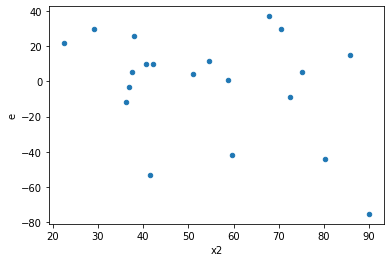

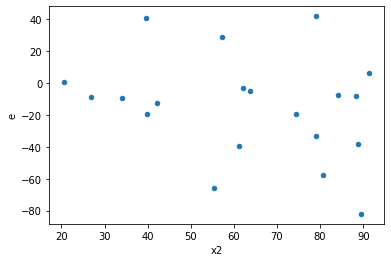

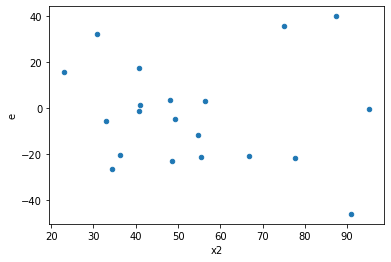

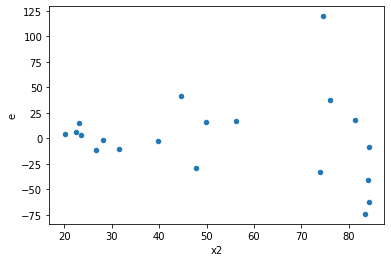

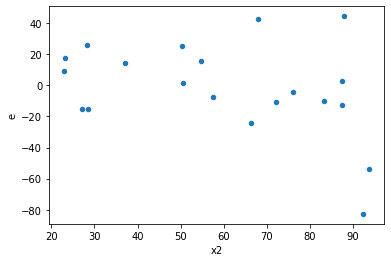

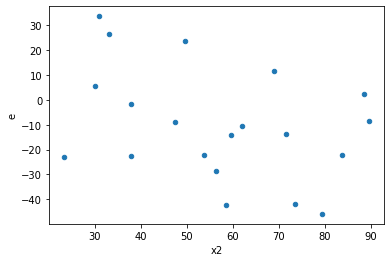

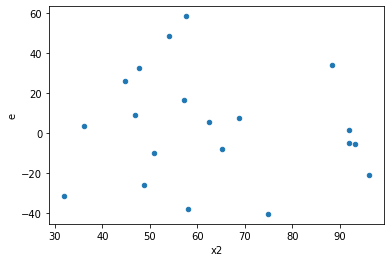

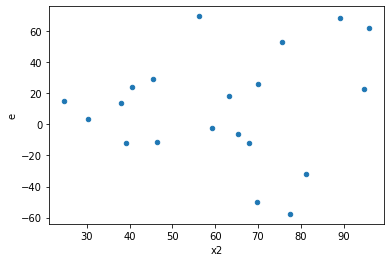

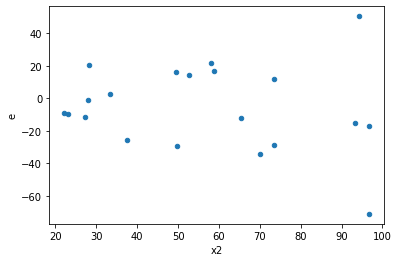

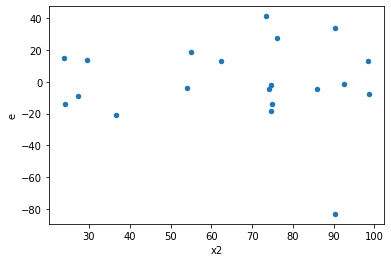

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,8960.919934642647,3156.3059585830156,2240.2299836606617,789.0764896457539,2.839053010775147,0.27676361008478567,0.8616181949576072,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,6973.7555870608585,4087.7299448322506,1743.4388967652146,1021.9324862080626,1.706021601519237,0.5719900455939497,0.7140049772030251,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,4239.75125694455,2294.751924724283,1059.9378142361375,573.6879811810708,1.8475858811858106,0.5167759080489884,0.7416120459755058,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,15735.644297118182,226.75627783415695,3933.9110742795456,56.68906945853924,69.39452546767761,0.0002573589414560651,0.999871320529272,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,7525.007131285391,1543.899453071474,1881.2517828213477,385.9748632678685,4.874026683742224,0.10702938784046645,0.9464853060797668,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,7112.6777685466795,3164.825775972649,1778.1694421366699,791.2064439931622,2.2474152677048185,0.3949141355263899,0.8025429322368051,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,7280.264553099551,963.4981235468493,1820.0661382748879,240.87453088671234,7.556075486996582,0.04453207193419795,0.977733964032901,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,7034.734444876439,266.61433316740016,1758.6836112191097,66.65358329185004,26.385432325798902,0.0026608679751565223,0.9986695660124217,Reject001=0 : Heteroscedasticity
10.0,5.0,5.0,2416.612948635073,860.4687615934006,604.1532371587682,215.11719039835015,2.808484231501946,0.2815835915220801,0.8592082042389599,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,8960.919934642647,3156.3059585830156,2240.2299836606617,789.0764896457539,2.839053010775147,0.27676361008478567,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,6973.7555870608585,4087.7299448322506,1743.4388967652146,1021.9324862080626,1.706021601519237,1.4280099544060503,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,4239.75125694455,2294.751924724283,1059.9378142361375,573.6879811810708,1.8475858811858106,1.4832240919510116,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,15735.644297118182,226.75627783415695,3933.9110742795456,56.68906945853924,69.39452546767761,0.0002573589414560651,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,7525.007131285391,1543.899453071474,1881.2517828213477,385.9748632678685,4.874026683742224,0.10702938784046645,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,1741.2228290978628,2380.318495185283,435.3057072744657,595.0796237963208,0.7315083391654809,0.7399113573801985,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,1522.310226548672,1892.641547809922,380.577556637168,473.1603869524805,0.8043309776804909,0.8169802121388271,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,7112.6777685466795,3164.825775972649,1778.1694421366699,791.2064439931622,2.2474152677048185,0.3949141355263899,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,7280.264553099551,963.4981235468493,1820.0661382748879,240.87453088671234,7.556075486996582,0.04453207193419795,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      907
Reject001=0 : Heteroscedasticity     93
Name: Result_test, dtype: int64